# Karate Club Dataset Exploration

## Importing modules

In [1]:
# Import PyTorch base
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

2.3.0+cu121


In [2]:
# Install PyTorch Geometric
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 37.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
# Visualizing tools
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

## Importing the Dataset

In [4]:
# Load dataset
from torch_geometric.datasets import KarateClub
dataset = KarateClub()

# Print details
print(f'Dataset name: {dataset}:')
print(f'No. of graphs: {len(dataset)}')
print(f'No. of features: {dataset.num_features}')
print(f'No. of classes: {dataset.num_classes}')

Dataset name: KarateClub():
No. of graphs: 1
No. of features: 34
No. of classes: 4


In [6]:
# Get graph object
print(dataset[0])

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [19]:
print("No. of nodes - ", dataset[0].num_nodes)
print("No. of edges - ", dataset[0].num_edges)
print("Isolated nodes present? - ", dataset[0].has_isolated_nodes())
print("Self loop edges present? - ", dataset[0].has_self_loops())
print("Average degree of a vertex - ", round(dataset[0].num_edges / dataset[0].num_nodes, 2))
print("Directed or undirected? - ", "Undirected" if dataset[0].is_undirected() else "Directed")

No. of nodes -  34
No. of edges -  156
Isolated nodes present? -  False
Self loop edges present? -  False
Average degree of a vertex -  4.59
Directed or undirected? -  Undirected


In [20]:
# Apperance of the nodes tensor
dataset[0].x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [22]:
# Apperance of the edges tensor
dataset[0].edge_index.t()

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [29]:
# Apperance of y (classes)
dataset[0].y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

## Visualizing the graph

In [24]:
# Convert graph to networkx object
from torch_geometric.utils import to_networkx
graph_data = dataset[0]
G = to_networkx(graph_data, to_undirected=True)

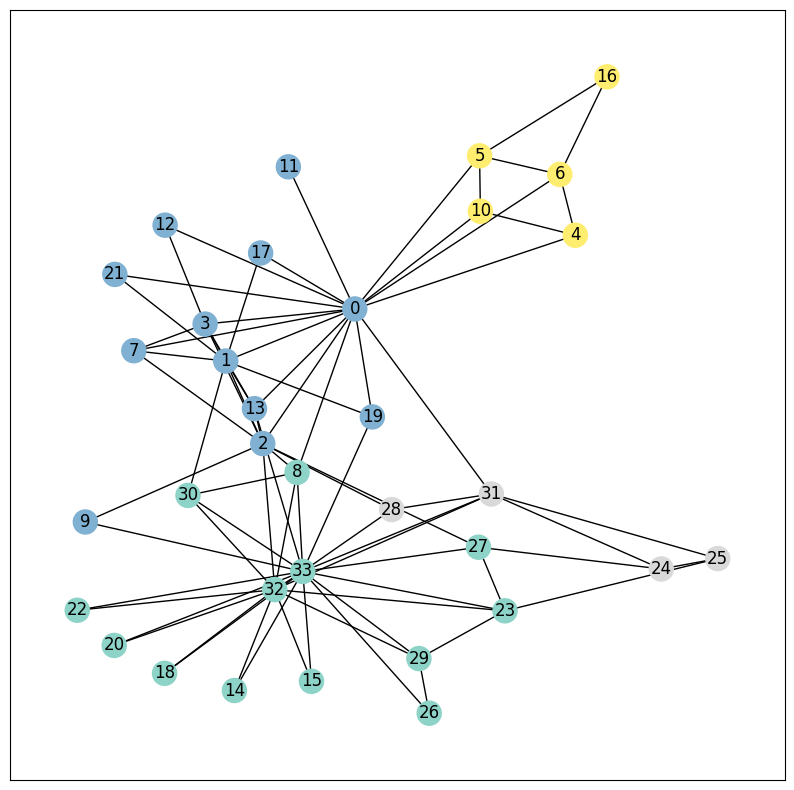

In [41]:
# Plot using matplotlib
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True,
                  node_color=graph_data.y, cmap="Set3")
plt.show()